https://www.analyticsvidhya.com/blog/2020/05/pycaret-machine-learning-model-seconds/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

https://pycaret.org/

https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv

In [1]:
import pandas as pd

In [25]:
df_train = pd.read_csv( 'https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv' )

In [26]:
df_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [5]:
df_train.shape

(4000, 14)

In [6]:
from pycaret import classification

In [27]:
classification_setup = classification.setup( data = df_train , target = 'Personal Loan' )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3830
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(4000, 14)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


https://pycaret.org/create-model/

## Model 01 : Decision Tree

In [9]:
classification_decision_tree = classification.create_model( 'dt' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9714,0.9015,0.8148,0.8800,0.8462,0.8304
1,0.9786,0.9220,0.8519,0.9200,0.8846,0.8728
2,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589
3,0.9714,0.9180,0.8519,0.8519,0.8519,0.8360
4,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589
5,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541
6,0.9857,0.9921,1.0000,0.8710,0.9310,0.9231
7,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770
8,0.9786,0.9054,0.8148,0.9565,0.8800,0.8683
9,0.9713,0.9497,0.9231,0.8000,0.8571,0.8413


In [12]:
boosting = classification.ensemble_model( classification_decision_tree , method = 'Boosting' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9714,0.9015,0.8148,0.8800,0.8462,0.8304
1,0.9786,0.9220,0.8519,0.9200,0.8846,0.8728
2,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589
3,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541
4,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633
5,0.9714,0.9180,0.8519,0.8519,0.8519,0.8360
6,0.9893,0.9941,1.0000,0.9000,0.9474,0.9414
7,0.9857,0.9259,0.8519,1.0000,0.9200,0.9122
8,0.9786,0.9054,0.8148,0.9565,0.8800,0.8683
9,0.9713,0.9497,0.9231,0.8000,0.8571,0.8413


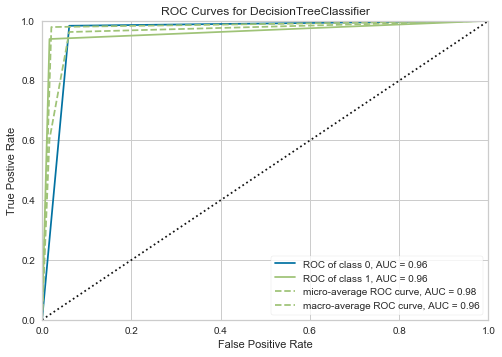

In [23]:
classification.plot_model( classification_decision_tree , plot = 'auc' )

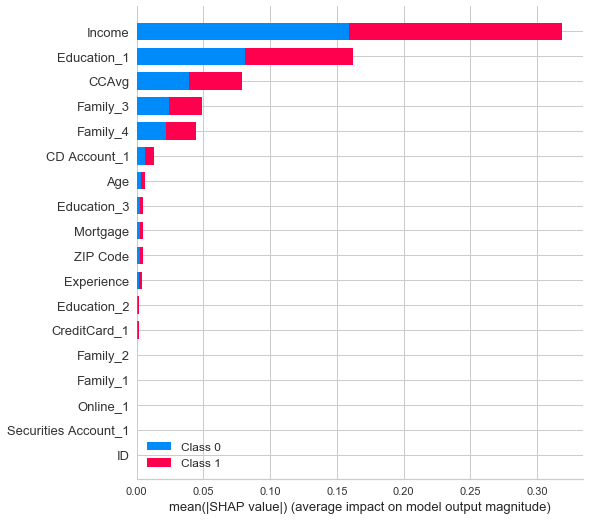

In [24]:
classification.interpret_model( classification_decision_tree )

# Model 02 - adaboost

In [17]:
classification_adaboost = classification.create_model( 'ada' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9464,0.9523,0.5926,0.8000,0.6809,0.6523
1,0.9429,0.9697,0.5926,0.7619,0.6667,0.6359
2,0.9607,0.9911,0.7037,0.8636,0.7755,0.7542
3,0.9571,0.9375,0.6296,0.8947,0.7391,0.7166
4,0.9500,0.9786,0.7037,0.7600,0.7308,0.7033
5,0.9786,0.9864,0.8519,0.9200,0.8846,0.8728
6,0.9714,0.9947,0.8519,0.8519,0.8519,0.8360
7,0.9750,0.9795,0.8889,0.8571,0.8727,0.8589
8,0.9679,0.9754,0.6667,1.0000,0.8000,0.7833
9,0.9642,0.9836,0.7308,0.8636,0.7917,0.7722


#  Blending ( Models 01 & 02 )

In [18]:
blender = classification.blend_models( estimator_list = [ classification_decision_tree , classification_adaboost ] )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9571,0.0,0.5556,1.0000,0.7143,0.6932
1,0.9571,0.0,0.5556,1.0000,0.7143,0.6932
2,0.9643,0.0,0.6667,0.9474,0.7826,0.7638
3,0.9571,0.0,0.5926,0.9412,0.7273,0.7053
4,0.9607,0.0,0.6296,0.9444,0.7556,0.7351
5,0.9786,0.0,0.8148,0.9565,0.8800,0.8683
6,0.9821,0.0,0.8519,0.9583,0.9020,0.8922
7,0.9857,0.0,0.8519,1.0000,0.9200,0.9122
8,0.9607,0.0,0.5926,1.0000,0.7442,0.7244
9,0.9642,0.0,0.6923,0.9000,0.7826,0.7634


# Bagging ( Models 01 & 02 blended )

In [29]:
bagging = classification.ensemble_model( blender , method = 'Bagging' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9857,0.9617,0.8519,1.0000,0.9200,0.9122
1,0.9679,0.9442,0.6667,1.0000,0.8000,0.7833
2,0.9714,0.9049,0.7037,1.0000,0.8261,0.8110
3,0.9643,0.9074,0.6296,1.0000,0.7727,0.7544
4,0.9714,0.9441,0.7037,1.0000,0.8261,0.8110
5,0.9786,0.9805,0.7778,1.0000,0.8750,0.8635
6,0.9571,0.8854,0.6296,0.8947,0.7391,0.7166
7,0.9679,0.9215,0.7037,0.9500,0.8085,0.7914
8,0.9679,0.9234,0.7037,0.9500,0.8085,0.7914
9,0.9677,0.9421,0.6538,1.0000,0.7907,0.7740


# Prediction

In [28]:
df_2pred = pd.read_csv( 'https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv' )

In [30]:
predictions = classification.predict_model(  bagging , data = df_2pred )

In [31]:
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,0.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,0.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,0.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,0.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,0.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,0.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,0.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,0.0


In [32]:
predictions[ 'Label' ].value_counts( )

0    925
1     75
Name: Label, dtype: int64

# Save & Load Model

In [33]:
classification.save_model( bagging , 'pycaret_bagging_model' )

Transformation Pipeline and Model Succesfully Saved


In [36]:
bagging_model_loaded = classification.load_model( model_name = 'pycaret_bagging_model' )

Transformation Pipeline and Model Sucessfully Loaded


In [37]:
classification.predict_model(  bagging_model_loaded , data = df_2pred )

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,0.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,0.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,0.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,0.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,0.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,0.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,0.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,0.0
